In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data_sub_threshold = np.loadtxt('hh_neuron_sub_threshold.csv', delimiter=',')
data_super_threshold = np.loadtxt('hh_neuron_super_threshold.csv', delimiter=',')
data_ramp = np.loadtxt('hh_neuron_ramp.csv', delimiter=',')

In [114]:
def plot_neuron_response_(t, v, J, figsize=(2.5,2.5), label_y1='Membrane potential $v$ (mV)', label_y2='Input current $J$ (pA)'):
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax1.plot(t, v) # Input current
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel(label_y1)

    ax2.plot(t, J, 'k--', linewidth=1) # Input current
    ax2.set_ylabel(label_y2)

    return fig;

def plot_neuron_response(data, figsize=(2.5,2.5)):
    ts = data[:, 0] > 0.6
    return plot_neuron_response_(data[ts, 0], data[ts, 1] * 1e3, data[ts, 5] * 1e12, figsize)

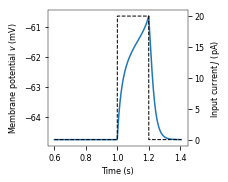

In [115]:
fig = plot_neuron_response(data_sub_threshold);
fig.savefig("../hh_neuron_sub_threshold.pdf", transparent=True, bbox_inches="tight")

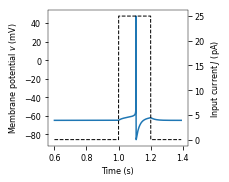

In [116]:
fig = plot_neuron_response(data_super_threshold);
fig.savefig("../hh_neuron_super_threshold.pdf", transparent=True, bbox_inches="tight")

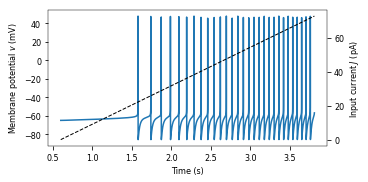

In [117]:
fig = plot_neuron_response(data_ramp, figsize=(5,2.5));
fig.savefig("../hh_neuron_ramp.pdf", transparent=True, bbox_inches="tight")

In [122]:
T = 5
dt = 1e-5
ts = np.arange(0.6, T, dt)
tau_ref = 2e-3
tau_rc = 60e-3

v, τ = 0.0, 0.0
vs, Js = np.zeros_like(ts), np.zeros_like(ts)
for i, t in enumerate(ts):
    J = Js[i] = 2e-6 * ((t - 0.6) / (5 - 0.6))
    if τ > 0.0:
        v = 0.0
        τ -= dt
    else:
        v = v - dt * (v - R * J) / tau_rc
        if v > 1.0:
            v = 5.0
            τ = tau_rc
    vs[i] = v

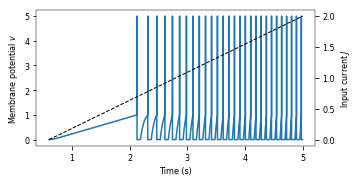

In [123]:
fig = plot_neuron_response_(ts, vs, Js * 1e6, (5,2.5), 'Membrane potential $v$', 'Input current $J$');
fig.savefig("../lif_neuron_ramp.pdf", transparent=True, bbox_inches="tight")